# Linear Regression with Python

Your neighbor is a real estate agent and wants some help predicting housing prices for regions in the USA. It would be great if you could somehow create a model for her that allows her to put in a few features of a house and returns back an estimate of what the house would sell for.

She has asked you if you could help her out with your new data science skills. You say yes, and decide that Linear Regression might be a good path to solve this problem!

Your neighbor then gives you some information about a bunch of houses in regions of the United States,it is all in the data set: USA_Housing.csv.

The data contains the following columns:

'Avg. Area Income': Avg. Income of residents of the city house is located in.
'Avg. Area House Age': Avg Age of Houses in same city
'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
'Area Population': Population of city house is located in
'Price': Price that the house sold at
'Address': Address for the house

### Data Aquisition and Clean-up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df  = pd.read_csv(r'USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
df.shape

(5000, 7)

In [4]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
df[['Address']]

,Address
0,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,USS Barnett\r\nFPO AP 44820
4,USNS Raymond\r\nFPO AE 09386
...,...
4995,USNS Williams\r\nFPO AP 30153-7653
4996,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,USS Wallace\r\nFPO AE 73316


### Exploratory Data Analysis

In [8]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

<AxesSubplot:xlabel='Price', ylabel='Count'>

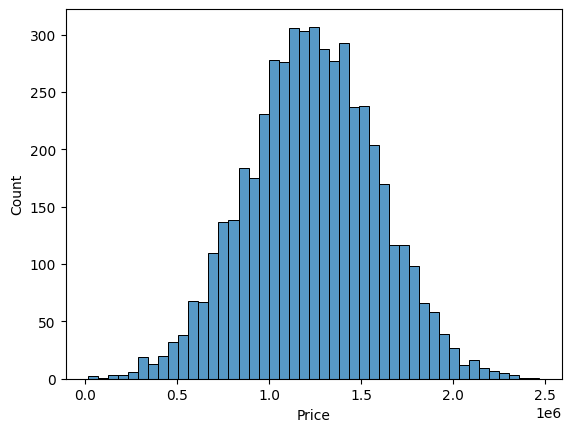

In [9]:
sns.histplot(df['Price'])

<AxesSubplot:>

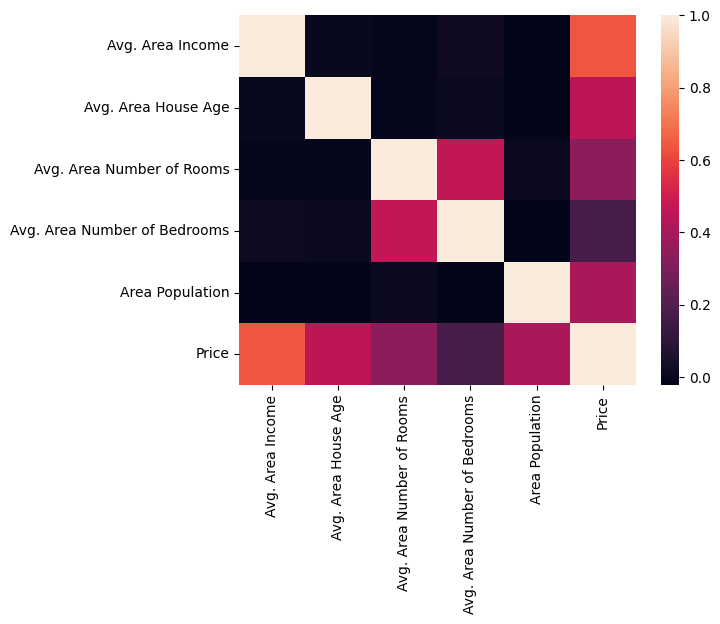

In [11]:
sns.heatmap(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']].corr())

### Training the Linear Regression Model

In [12]:
columns = df.columns
columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

##### Setting the target and predictors

In [13]:
#Setting the target column
target = 'Price'
y = df['Price']
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [14]:
#Get the predictor columns
droplist = [target, 'Address']
predictors = df.drop(droplist, axis=1).columns
X = df[predictors]
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


##### Splitting the data into training and test data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)

In [18]:
y_test.head()

789     8.008091e+05
2507    1.620949e+06
2376    1.219637e+06
1378    1.172133e+06
598     8.644838e+05
Name: Price, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

In [21]:
lm.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
lm.intercept_

-2637299.033328127

In [29]:
lm.coef_

array([2.15780494e+01, 1.65637027e+05, 1.20659949e+05, 1.65113905e+03,
       1.52007439e+01])

In [30]:
coeff_df = pd.DataFrame(lm.coef_, predictors, columns=['Coefficients'])
coeff_df

,Coefficients
Avg. Area Income,21.578049
Avg. Area House Age,165637.026941
Avg. Area Number of Rooms,120659.948816
Avg. Area Number of Bedrooms,1651.139054
Area Population,15.200744


##### Testing the model by using the test data for predictions

In [31]:
predictions = lm.predict(X_test)

In [36]:
predictions

array([ 814229.04374141, 1560144.87384596, 1321368.87058069,
       1188462.22962462,  968427.27850302, 1248318.30020868,
       1191580.20461225,  734808.99676281, 1217780.01335376,
       1538442.30345233, 1139449.12170644,  976381.36888122,
        969371.49143931, 1812504.1038559 , 1335372.12934437,
        685757.16210773, 2183238.50422972,  927514.08385533,
       1188759.63109872,  806610.89548327,  737989.11633342,
       1436937.90144407, 2047078.33071337, 1530095.34327027,
        704878.15169128, 1443792.27595116, 1923410.24640584,
        797881.70512183, 1677889.40386025, 1022060.62736229,
       1120649.24364101, 1218778.90430468, 1197648.05474967,
       1323863.40492679, 1903068.79741572, 1703661.10745399,
       1674168.72768023, 1535536.36536117, 1061869.10372667,
        661539.65894785, 1635644.42940215, 1773209.63981791,
       1508623.85158843,  872421.25700407, 1180448.05102342,
        928886.75497447, 1416151.23641668, 1473840.73270029,
       1772766.92461515,

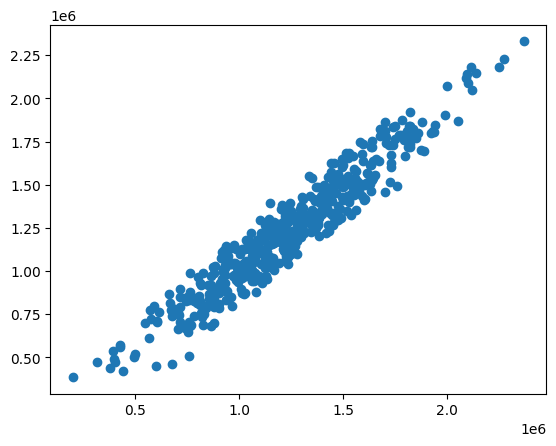

In [32]:
plt.scatter(y_test, predictions)

##### Evaluation metrics

In [33]:
from sklearn import metrics

In [34]:
metrics.mean_absolute_error(y_test, predictions)

80869.31583654645

In [35]:
np.sqrt(metrics.mean_squared_error(y_test, predictions)) #RMSE

99151.73255945474

In [36]:
np.sqrt(metrics.mean_squared_error(y_test, predictions)) # retrained model with 10% test data

99151.73255945474

#### How to make a prediction of a foreign values?

In [ ]:
#['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population'

In [39]:
lm.predict([[100000, 15, 5, 3, 50000]])

c:\Users\mindf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3369364.07157032])

In [40]:
{'PREDICTED_PRICE':lm.predict([[100000, 15, 5, 3, 50000]])}

c:\Users\mindf\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


{'PREDICTED_PRICE': array([3369364.07157032])}